In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras import layers


In [3]:
# Load and Process the datasets

(X_train,y_train),(X_test,y_test)= cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

y_train shape: (50000, 1)
y_test shape: (10000, 1)


In [7]:
# X_train

In [8]:
# We will scale the image
X_train=X_train.astype("float32")/255.0
X_test=X_test.astype("float32")/255.0

# perform data augmentation

data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizonatal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

X_train=data_augmentation(X_train)

In [9]:
# One hot encode the labels
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [10]:
# X_train    # after scaling

In [11]:
y_train   # changed into categocial form

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [12]:
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [13]:
# Define a CNN model

model=Sequential()

# 1st convolutional layer
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))  # add dropout


# # 2nd convolutional layer
# model.add(Conv2D(64,(3,3), activation='relu',padding='same',
#           kernel_regularizer=regularizers.l2(0.001)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2,2)))
# model.add(tf.keras.layers.Dropout(0.5))  # add dropout

# 3rd convolutional layer
model.add(Conv2D(64,(3,3), activation='relu',padding='same',
          kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(1,1))
model.add(tf.keras.layers.Dropout(0.5))   # add dropout


# 4th convolution layer
model.add(Conv2D(64,(3,3), activation='relu',padding='same',
          kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))   # add dropout

# Flatten the output
model.add(Flatten())

# # fully connected layer
# model.add(Dense(32,activation='relu'))
# model.add(BatchNormalization())
# model.add(tf.keras.layers.Dropout(0.5 ))  # add dropout

model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5 ))  # add dropout



# output layer
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Compile the model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [15]:
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


In [16]:
print(X_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 10)


In [17]:
# Train the model  with callback

from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

# Early stopping to prevent overfitting
early_stopping=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

# Learning rate reduction on plateau
lr_reduction=ReduceLROnPlateau(monitor='val_loss', factor=0.5,patience=5,min_lr=1e-6)

train=model.fit(X_train,y_train,epochs=25,batch_size=32,
                validation_data=(X_test,y_test),
                callbacks=[early_stopping,lr_reduction])

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 251s 157ms/step - accuracy: 0.3032 - loss: 2.1479 - val_accuracy: 0.3023 - val_loss: 2.6420 - learning_rate: 0.0010
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 265s 159ms/step - accuracy: 0.4626 - loss: 1.5924 - val_accuracy: 0.5543 - val_loss: 1.3342 - learning_rate: 0.0010
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 249s 159ms/step - accuracy: 0.5043 - loss: 1.4659 - val_accuracy: 0.5039 - val_loss: 1.4419 - learning_rate: 0.0010
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 257s 156ms/step - accuracy: 0.5248 - loss: 1.4299 - val_accuracy: 0.6017 - val_loss: 1.2088 - learning_rate: 0.0010
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 261s 156ms/step - accuracy: 0.5468 - loss: 1.3823 - val_accuracy: 0.5832 - val_loss: 1.2530 - learning_rate: 0.0010
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 245s 157ms/step - accuracy: 0.5635 - loss: 1.3451 - val_accuracy: 0.5564 - val_loss: 1.3542 - learning_rate: 0.0010
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 272s 164ms

# model's validation accuracy and loss have improved, indicating better generalization

In [23]:
train.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

In [24]:
test_loss,test_accuracy=model.evaluate(X_test,y_test)
print(f"Test Loss : {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.6969 - loss: 0.9412
Test Loss : 0.9473819136619568
Test accuracy: 0.6952999830245972


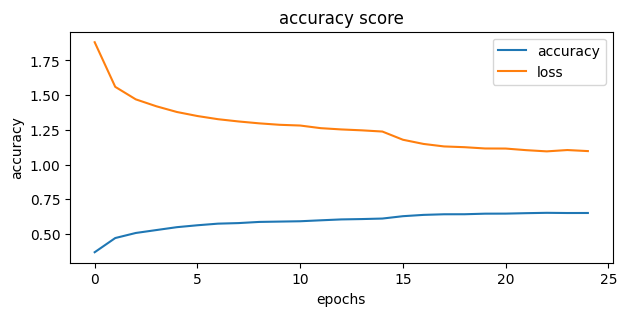

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,3))
plt.plot(train.history['accuracy'])
plt.plot(train.history['loss'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy','loss'])
plt.title('accuracy score');

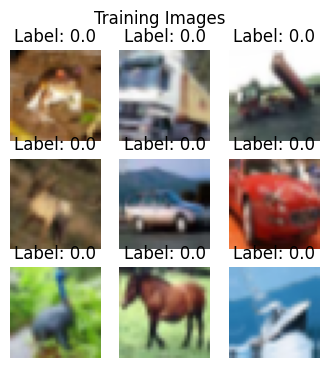

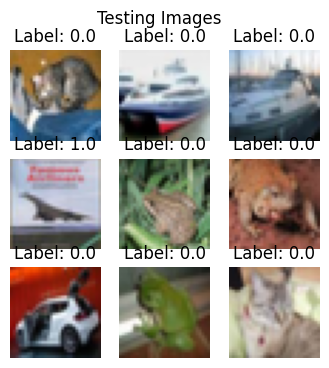

In [21]:
# Function to display a grid of images
def display_images(images, labels, title, num_images=9):
    plt.figure(figsize=(4,4))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i][0]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Display the first 9 training images
display_images(X_train, y_train, title="Training Images")

# Display the first 9 testing images
display_images(X_test, y_test, title="Testing Images")

In [25]:
import numpy as np
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step


<ipython-input-27-096be732f014>:12: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


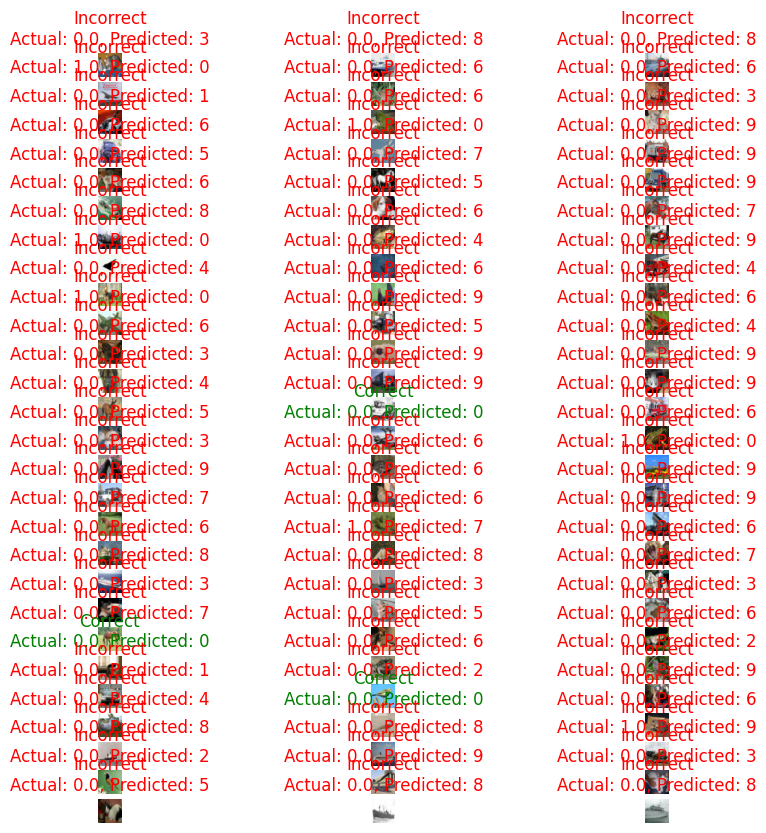

In [27]:
def display_images_with_predictions(images, actual_labels, predicted_labels, num_images=81):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(27, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"Actual: {actual_labels[i][0]}, Predicted: {predicted_labels[i]}")
        if actual_labels[i][0] == predicted_labels[i]:
            plt.title(f"Correct\nActual: {actual_labels[i][0]}, Predicted: {predicted_labels[i]}", color='green')
        else:
            plt.title(f"Incorrect\nActual: {actual_labels[i][0]}, Predicted: {predicted_labels[i]}", color='red')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display the first 9 test images with their actual and predicted labels
display_images_with_predictions(X_test, y_test, predicted_labels)


# #The main idea behind this to demonstrate how to show when the model is correct and incorrect.

# we can change the number for better visualization, replace the number 81 by 9 and 27 by 3